# jak używać:

function Lagrange(n, f, a, b, vec=eq_nodes(n, a, b))
    n     - ilość węzłów, 
    f     - funkcja do interpolowania
    [a,b] - przedział do interpolacji
    vec   - lista węzłów (domyślnie równoodległe)
zwraca funkcję poly(x), która dla danej wartości x zwraca wartość wielomianu interpolacyjnego Lagrang'a

function Baricentric_Lagrange(n, f, a, b , vec=eq_nodes(n, a, b), ch=false)
    n     - ilość węzłów, 
    f     - funkcja do interpolowania
    [a,b] - przedział do interpolacji
    vec   - lista węzłów (domyślnie równoodległe)
    ch    - jeśli węzły Chebyszewa, używa wzoru
zwraca funkcję poly(x), która dla danej wartości x zwraca wartość wielomianu interpolacyjnego Lagrang'a w formie barycentrycznej    

function Werner_Lagrange(n, f, a, b, vec=eq_nodes(n, a, b))
     --- || ---
zwraca funkcję poly(x), która dla danej wartości x zwraca wartość wielomianu interpolacyjnego Lagrang'a w formie barycentrycznej, gdzie waga barycentryczna jest oblicznona ze wzoru Wernera

function eq_nodes(n, a, b)
    n     - ilość węzłów
    [a,b] - predział
zwraca węzły równoodległe na zadanym przedziale

function ch_nodes(n, a, b)
    n     - ilość węzłów
    [a,b] - predział
zwraca węzły Chebyszewa na zadanym przedziale

function rd_nodes(n, a, b)
    n     - ilość węzłów
    [a,b] - predział
zwraca losowo utworzone węzły, posortowane rosnąco

function max_error(f, L, a, b)
    f     - funkcja interpolowana
    L     - wielomian interpolujący
    [a,b] - przedział interpolacji
zwraca największą różnicę (błąd) w wartościach funkcji a wielomianu, który ją interpoluje

In [42]:
include("../prog/program.jl")

max_error (generic function with 1 method)

In [3]:
using Plots
pyplot()

Plots.PyPlotBackend()

wreks!lagrange max error: 2.099029
bericentric max error: 2.099029
Werner max error: 2.099029



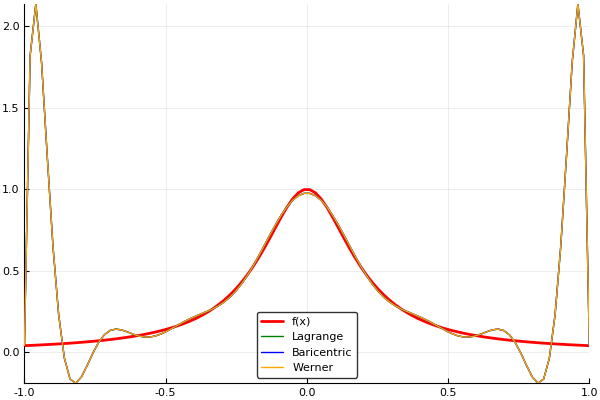

In [52]:
using Plots
pyplot()
#ylabel("test")
#xlabel("test")
f(x) = (1 + 25*(x^2))^(-1)
a = -1; b = 1; n = 15

p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b),true)
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot!(x, y, color="green", label="Lagrange")
y = p2.(x)
plot!(x, y, color="blue", label="Baricentric")
y = p3.(x)
plot!(x, y, color="orange", label="Werner")



lagrange max error: 1883612144949405.750000
bericentric max error: 1591311.635130
Werner max error: 13.366222



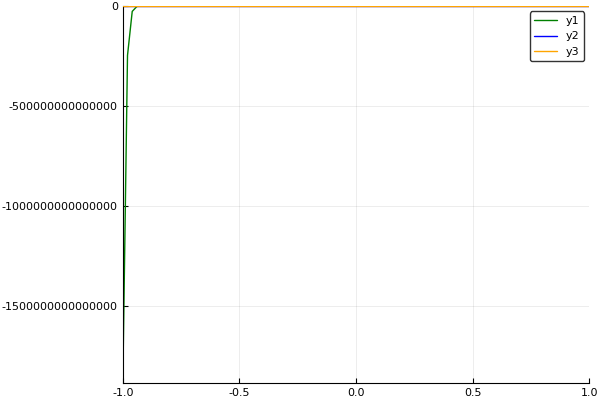

In [39]:
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot(x, y, color="green")
y = rd2.(x)
plot!(x, y, color="blue")
y = rd3.(x)
plot!(x, y, color="orange")

lagrange max error: 0.000005
bericentric max error: 0.000005
Werner max error: 0.019332



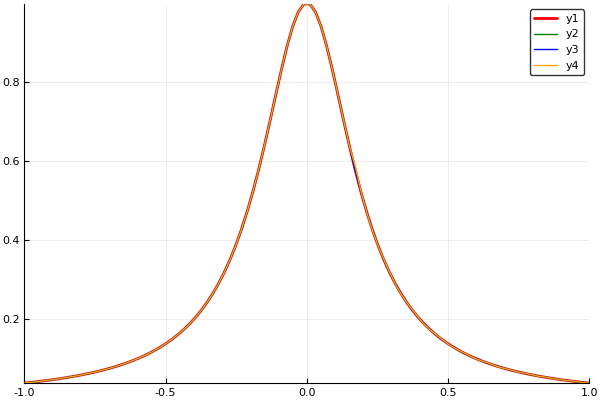

In [40]:
@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot!(x, y, color="green")
y = ch2.(x)
plot!(x, y, color="blue")
y = ch3.(x)
plot!(x, y, color="orange")


lagrange max error: 0.202609
bericentric max error: 0.202609


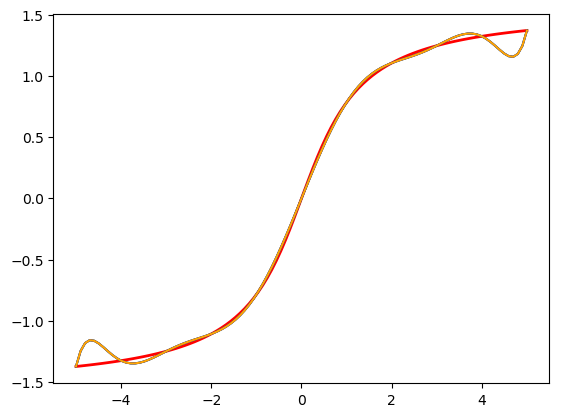

Werner max error: 0.202609


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcf6f14ed0>

In [504]:
f(x) = atan(x)
a = -5; b = 5; n = 10
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot(x, y, color="green", label="L(x)")
y = p2.(x)
plot(x, y, color="blue", label="B(x)")
y = p3.(x)
plot(x, y, color="orange", label="W(x)")


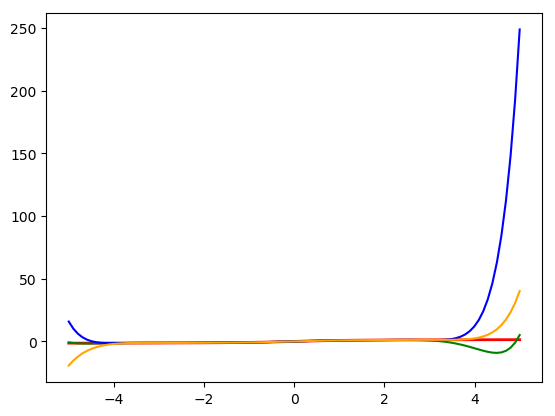

lagrange max error: 10.506624
bericentric max error: 247.515903
Werner max error: 38.754702


In [506]:
x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot(x, y, color="green")
y = rd2.(x)
plot(x, y, color="blue")
y = rd3.(x)
plot(x, y, color="orange")
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

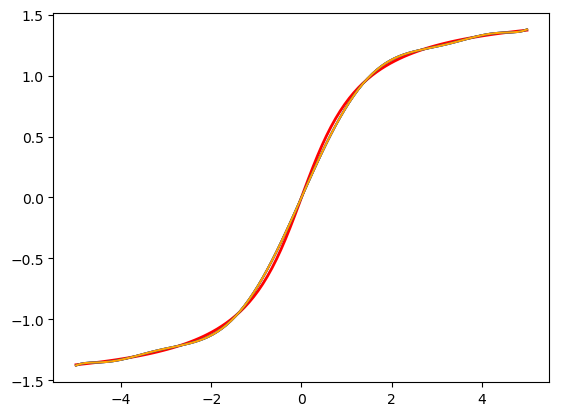

lagrange max error: 0.062210
bericentric max error: 0.062210
Werner max error: 0.062210


In [507]:
x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot(x, y, color="green")
y = ch2.(x)
plot(x, y, color="blue")
y = ch3.(x)
plot(x, y, color="orange")
@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

lagrange max error: 3.915349
bericentric max error: 3.915349


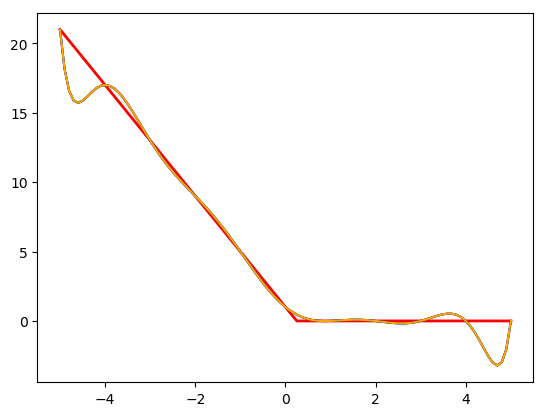

Werner max error: 3.915349


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcf6e2fd90>

In [508]:
f(x) = maximum([0.0, 1-4x])
a = -5; b = 5; n = 10
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot(x, y, color="green", label="L(x)")
y = p2.(x)
plot(x, y, color="blue", label="B(x)")
y = p3.(x)
plot(x, y, color="orange", label="W(x)")

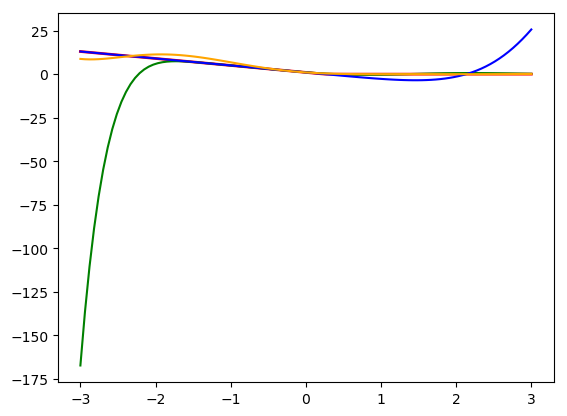

lagrange max error: 16600.562369
bericentric max error: 204.306700
Werner max error: 137.525525


In [511]:
x = linspace(-3,3, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot(x, y, color="green")
y = rd2.(x)
plot(x, y, color="blue")
y = rd3.(x)
plot(x, y, color="orange")
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

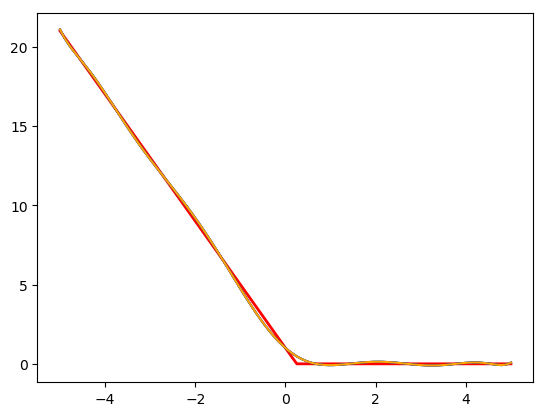

lagrange max error: 0.475348
bericentric max error: 0.475348
Werner max error: 0.475348


In [512]:
x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot(x, y, color="green")
y = ch2.(x)
plot(x, y, color="blue")
y = ch3.(x)
plot(x, y, color="orange")

@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

lagrange max error: 3.317735
bericentric max error: 3.317735


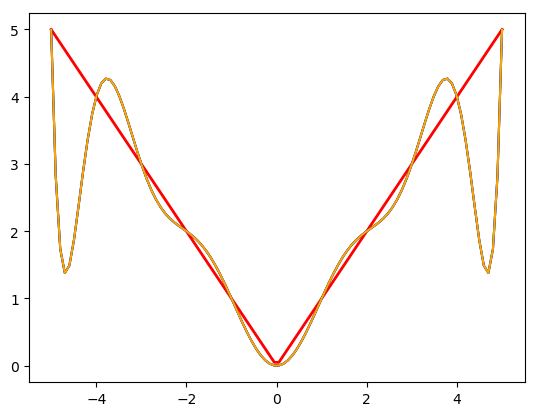

Werner max error: 3.317735


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcf837d810>

In [513]:
f(x) = abs(x)
a = -5; b = 5; n = 10
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot(x, y, color="green", label="L(x)")
y = p2.(x)
plot(x, y, color="blue", label="B(x)")
y = p3.(x)
plot(x, y, color="orange", label="W(x)")

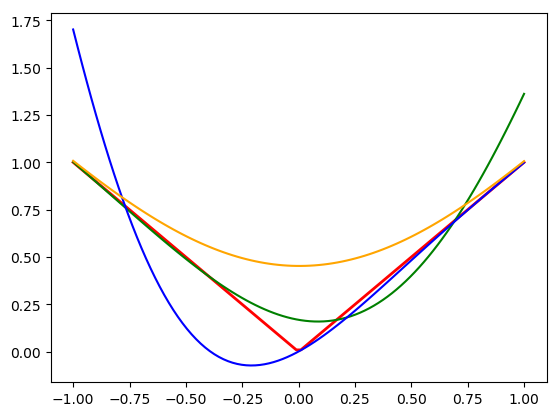

lagrange max error: 138.612942
bericentric max error: 5131.559017
Werner max error: 15.699349


In [515]:
x = linspace(-1,1, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot(x, y, color="green")
y = rd2.(x)
plot(x, y, color="blue")
y = rd3.(x)
plot(x, y, color="orange")
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

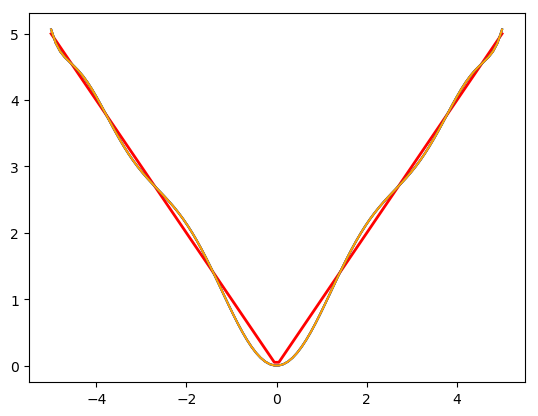

lagrange max error: 0.273108
bericentric max error: 0.273108
Werner max error: 0.273108


In [516]:
x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot(x, y, color="green")
y = ch2.(x)
plot(x, y, color="blue")
y = ch3.(x)
plot(x, y, color="orange")

@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

lagrange max error: 6.127413
bericentric max error: 6.127413


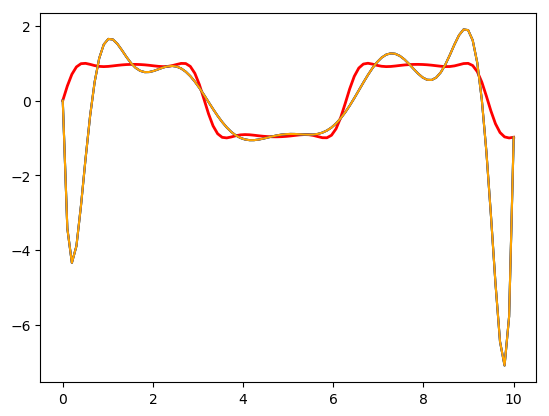

Werner max error: 6.127413


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcf8760d10>

In [523]:
f(x) = sin(2*sin(2*sin(x)))
a = 0; b = 10; n = 13
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot(x, y, color="green", label="L(x)")
y = p2.(x)
plot(x, y, color="blue", label="B(x)")
y = p3.(x)
plot(x, y, color="orange", label="W(x)")

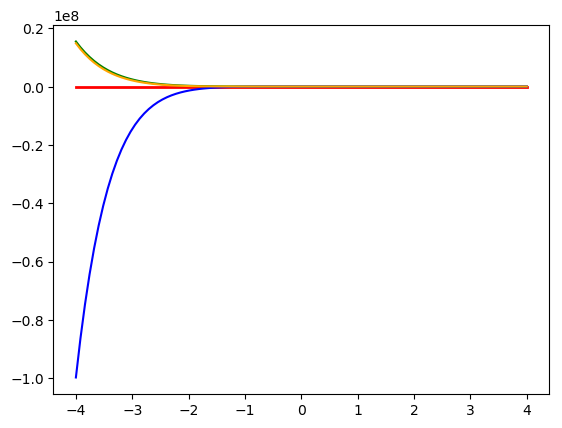

lagrange max error: 962.864277
bericentric max error: 65867.506632
Werner max error: 589.445380


In [525]:
x = linspace(-4,4, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot(x, y, color="green")
y = rd2.(x)
plot(x, y, color="blue")
y = rd3.(x)
plot(x, y, color="orange")
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

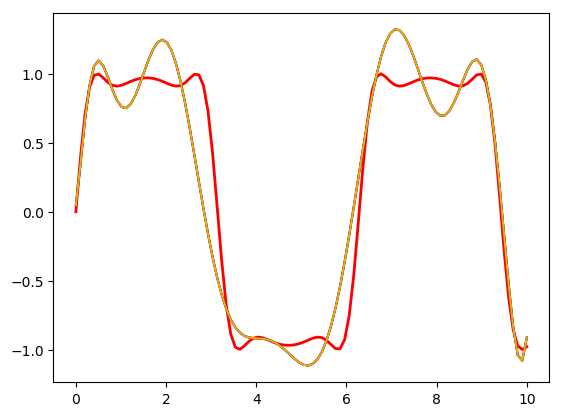

lagrange max error: 0.907202
bericentric max error: 0.907202
Werner max error: 0.907202


In [526]:
x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot(x, y, color="green")
y = ch2.(x)
plot(x, y, color="blue")
y = ch3.(x)
plot(x, y, color="orange")

@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

lagrange max error: 0.000111
bericentric max error: 0.000111


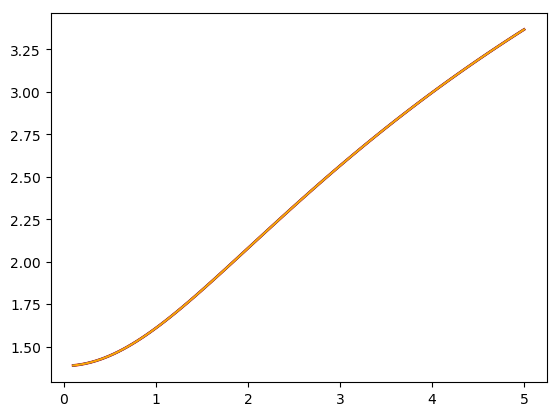

Werner max error: 0.000111


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcf7018d10>

In [541]:
f(x) = log(complex(x^2 + 4))
a = 0.1; b = 5; n = 10
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot(x, y, color="green", label="L(x)")
y = p2.(x)
plot(x, y, color="blue", label="B(x)")
y = p3.(x)
plot(x, y, color="orange", label="W(x)")

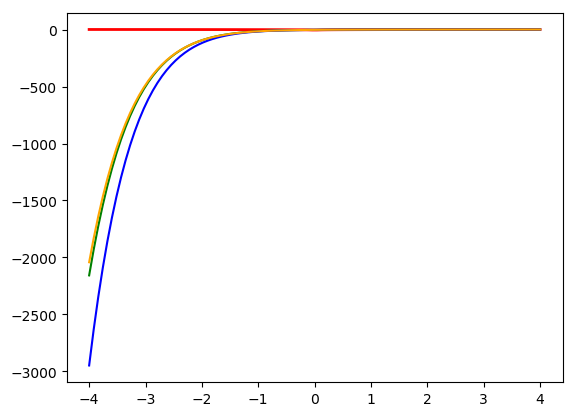

lagrange max error: 0.000301
bericentric max error: 0.000100
Werner max error: 0.000040


In [538]:
x = linspace(-4,4, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot(x, y, color="green")
y = rd2.(x)
plot(x, y, color="blue")
y = rd3.(x)
plot(x, y, color="orange")
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

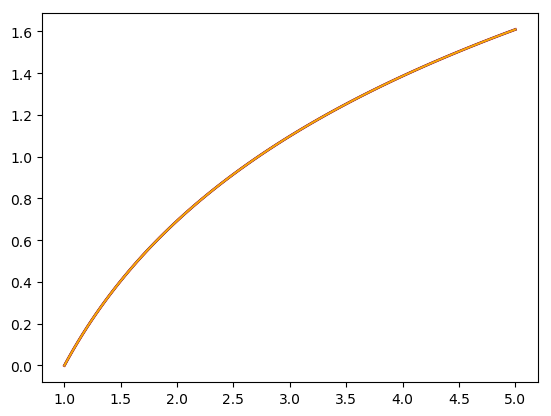

lagrange max error: 0.000010
bericentric max error: 0.000010
Werner max error: 0.000010


In [539]:
x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot(x, y, color="green")
y = ch2.(x)
plot(x, y, color="blue")
y = ch3.(x)
plot(x, y, color="orange")

@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))

lagrange max error: 5.214724
bericentric max error: 5.214724


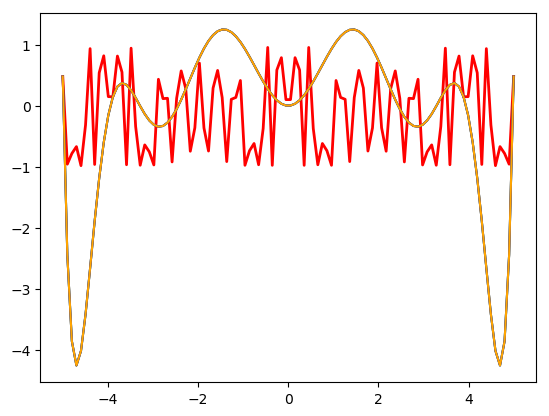

Werner max error: 5.214724


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcf6525dd0>

In [544]:
f(x) = sin(4*pi^2*x^2)
a = -5; b = 5; n = 10
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot(x, y, color="green", label="L(x)")
y = p2.(x)
plot(x, y, color="blue", label="B(x)")
y = p3.(x)
plot(x, y, color="orange", label="W(x)")

lagrange max error: 579928461456757158313984.000000
bericentric max error: 70800498346516.640625


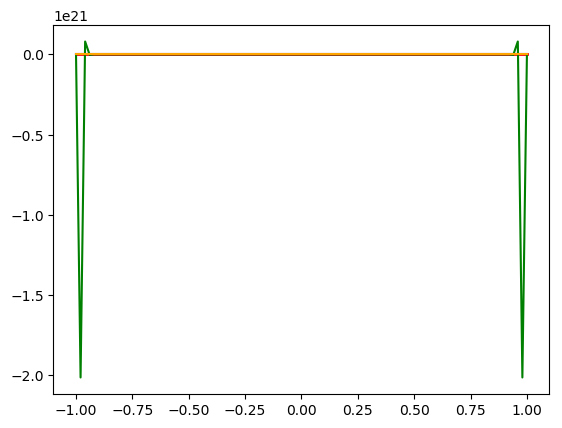

Werner max error: 1588315782.072562


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdcf63d29d0>

In [559]:
f(x) = abs(x) + x/2 - x^2
a = -1; b = 1; n = 100
p1 = Lagrange(n, f, a, b)
p2 = Baricentric_Lagrange(n, f, a, b)
p3 = Werner_Lagrange(n, f, a, b)
ch1 = Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch2 = Baricentric_Lagrange(n, f, a, b, ch_nodes(n, a, b))
ch3 = Werner_Lagrange(n, f, a, b, ch_nodes(n, a, b))
rd1 = Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd2 = Baricentric_Lagrange(n, f, a, b, rd_nodes(n, a, b))
rd3 = Werner_Lagrange(n, f, a, b, rd_nodes(n, a, b))

@printf("lagrange max error: %f\n", max_error(f, p1, a, b))
@printf("bericentric max error: %f\n", max_error(f, p2, a, b))
@printf("Werner max error: %f\n", max_error(f, p3, a, b))

x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0, label="f(x)")
y = p1.(x)
plot(x, y, color="green", label="L(x)")
y = p2.(x)
plot(x, y, color="blue", label="B(x)")
y = p3.(x)
plot(x, y, color="orange", label="W(x)")

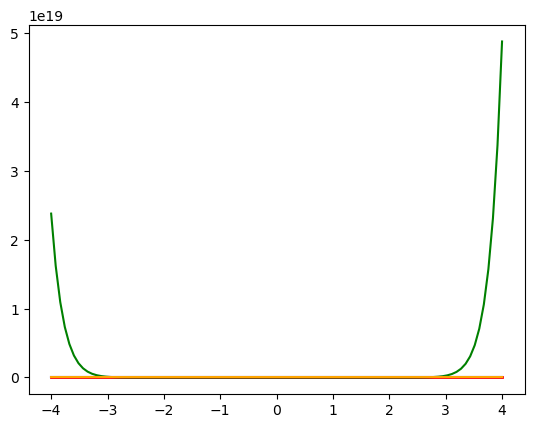

lagrange max error: 1392741.293696
bericentric max error: 7295.600756
Werner max error: 2034801.876468


In [557]:
x = linspace(-4,4, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = rd1.(x)
plot(x, y, color="green")
y = rd2.(x)
plot(x, y, color="blue")
y = rd3.(x)
plot(x, y, color="orange")
@printf("lagrange max error: %f\n", max_error(f, rd1, a, b))
@printf("bericentric max error: %f\n", max_error(f, rd2, a, b))
@printf("Werner max error: %f\n", max_error(f, rd3, a, b))

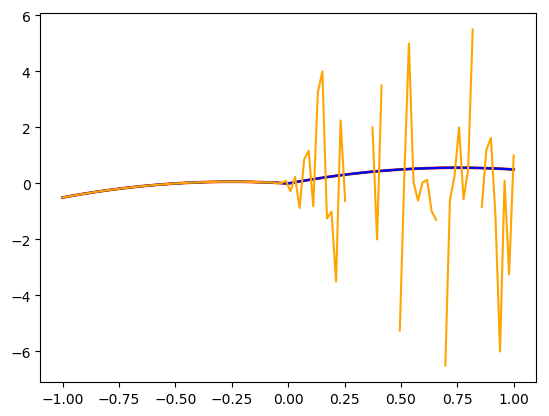

lagrange max error: 0.005699
bericentric max error: 0.005699
Werner max error: Inf


In [561]:
x = linspace(a,b, 100); y = f.(x)
plot(x, y, color="red", linewidth=2.0)
y = ch1.(x)
plot(x, y, color="green")
y = ch2.(x)
plot(x, y, color="blue")
y = ch3.(x)
plot(x, y, color="orange")

@printf("lagrange max error: %f\n", max_error(f, ch1, a, b))
@printf("bericentric max error: %f\n", max_error(f, ch2, a, b))
@printf("Werner max error: %f\n", max_error(f, ch3, a, b))


INFO: Precompiling module Calculus.


(::#1) (generic function with 1 method)

(::#1) (generic function with 1 method)

0.5403023058631036

-0.841471649579559